<a href="https://colab.research.google.com/github/fernandotoscano/BIOINFORMATICS/blob/main/C%C3%B3pia_de_CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

# **PART_4**
**NOW WELCOME TO PART_4, OF BIOINFORMATICS FROM SCRATCH SERIES WHERE WE 'LL SHOW HOW TO DO A BIOINFORMATICS PROJECT USING MACHINE LEARNING IN A STEP BY STEP MANNER SO IN THIS VIDEO SECTION WE'RE GOING TO BUILD A SIMPLE REGRESSION MODEL BASED ON THE RANDOM FOREST ALGORITHM AND THE DATASET THAT WE'RE USING IS BASED ON THE ACETHYLCHOLINESTERASE INHIBITORS WHICH IS DERIVED FROM THE PREVIOUS TUTORIAL "VIDEOS", AND SO WITHOUT FURTHER DO LET'S GET STARTED, SO 1ST THING THAT WE'LL GONNA DO IS HEAD OVER TO THE GITHUB OF THE DATAPROFESSOR AND THEN WE WANT TO CLICK ON THE CODE LINK AND THEN CLICK ON "PYTHON" AND THEN WE WANT TO FIND "CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb", AND SO IF WE HAVEN'T YET GONE THROUGH THE PREVIOUS 3 CHAPTERS HERE, PLEASE MAKE SURE TO GO THRFOUGH THAT IN THE PROVIDED PLAYLIST UP IN THE DATPROFESSOR. AND SO WEWANNA CLICK ON THE PART_4 AND THEN RIGHT CLICK ON THE RAW LINK AND THEN SAVE IT IN TO OUR COMPUTER.
SO LET'S GET STARTED:**

**SO THE 1ST BLOCK OF CODE HERE IS TO IMPORT THE NECESSARY LIBRARIES, SO WE'RE GOING TO SIMPLY RUN THE NEXT BLOCK OF CODE:**

## **1. Import libraries**

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

**AND THEN WE'RE GOING TO LOAD IN THE DATA SET TAHT WE HACE PREPARED FROM THE PRIOR CHAPTER'S. SO WE'RE GOING TO LOAD IT IN. SO THE DATA SET HERE IS BASED ON THE PUBCHEM FINGERPRINT. AND IT'S GONNA CONTAIN THE BIOACTIVITY DATA FOR THE ACETYLCHOLINESTERASE INHIBITORS SO ONE OF THE STUDENTS ASKED A VERY GREAT QUESTION IN THE PRIOR CHAPTER ON PART_3, AND IN PART_2 WE HAVE PREPARED LIPINSKI DESCRIPTORS AND THEN, THE QUESTION WAS, "*WHAT'S THE DIFFERENCE BETWEEN THESE 2*?". SO THAT'S A VERY GREAT QUESTION. SO LIPINSKI DESCRIPTORS WILL PROVIDE US WITH A SET OF SIMPLE MOLECULAR DESCRIPTORS THAT ESSENTIALLY WILL BE GIVING US A QUICK OVERVIEW OF THE DRUG-LIKE PROPERTIES OF THE MOLECULE AND SO HISTORICALLY, CHRISTOPHER LIPINSKI CREATE A SET OF 4 DESCRIPTORS THAT HE HAD INVESTIGATED IN HIS RESEARCH THAT ARE RESPONSIBLE FOR DRUG-LIKE PROPERTIES WHEREBY HE ANALYZED A SET OF ORALLY ACTIVE DRUGS, AND THEN HE CAME UP WITH THIS RULE OF 5 WHEREBY COMPOUNDS THAT ARE PASSING THE RULE OF 5 WILL MAKE GOOD ORAL DRUGS AND SO FOR THE PUBCHEM FINGERPRINT WHICH WE WILL BE USING TODAY AS WELL FOR THE MODEL BUILDING IT. IT IS DESCRIBING THE LOCAL FEATURES OF THE MOLECULES. SO THE LIPINSKI DESCRIPTOR WILL BE DESCRIBING THE GLOBAL FEATURES (CARACTERÍSTICAS/PROPRIEDADES/FUNCIONALIDADES) OF THE MOLECULE PARTICULARLY THE MOLECULAR SIZE OF THE MOLECULE THE   SOLUBILITY OF THE MOLECULE AND ALSO THE NUMBER OF HYDROGEN BOND DONOR AND ACCEPTOR, WHICH IS THE PROPENSITY TO ACCEPT AND DONATE HYDROGEN BONDS. AND BY LOCAL FEATURES FOR THE PUBCHEM WE MEAN THAT EACH MOLECULE WILL BE DESCRIBED BY THE UNIQUE BUILDING BLOCKS OF THE MOLECULE SO IF WE THINK OF MOLECULES AS KINFD OPF A LEGO BUILDING BLOCKS, SO EACH MOLECULE WILL BE COMPRISED OF SEVERAL LEGO BUILDING BLOCKS AND THE WAY AT WHICH THE LEGO BUILDING BLOCKS ARE CONNECTED IT WILL CREATE A UNIQUE PROPERTIES FOR THE DRUG THAT IS THE ESSENCE OF DRUG DISCOVERY AND ALSO THE ESSENCE OF DRUG DESIGN SO ESSENTIALLY THE CONNECTIVITY OF THE LEGO BLOCKS ARE GIVING RISE TO THE UNIQUE STRUCTURE OF THE MOLECULE AND ALSO THE UNIQUE MOLECULAR PROPERTIES AND SO THEREFORE WE HAVE TO FIND A WAY TO REARRANGE THE LEGO BUILDING BLOCK IN SUCH A WAY THAT THE MOLECULE PROVIDES THE MOST POTENCY TOWARD THE TARGET PROTEIN THAT IT WANTS TO INTERACT WHILE ALSO BEING SAFE AND NOT SO TOXIC RIGHT BECAUSE IF THE MOLECULE IS TOXIC WE'LL HAVE SIDE EFFECTS HAPPENING . SO WE HAVE ALREADY DOWNLOADED THE DATA SET (IN THE NEXT LINE OF CODE):  **  

In [31]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-01-30 11:24:03--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-01-30 11:24:03--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [32]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

**LET'S TAKE A LOOK AT THE INPUT FEATURES SO THE PUBCHEM FINGERPRINT HAS 881 INPUT FEATURES SO LET'S THINK OF THE INPUT FEATURES FOR THE PUBCHEM FINGERPRINTS AS KIND OF LIKE A UNIQUE AS THE NAME IMPLIES FINGERPRINTS SO EACH MOLECULE WILL BE GIVEN A UNIQUE FINGERPRINT KIND LIKE EACH OF US HUMANS HAVE A UNIQUE FINGERPRINT RIGHT? AND SO THE UNIQUE FINGERPRINTS OF EACH MOLECULE WILL ALLOW THE MACHINE LEARNING ALGORITHM TO LEARN FROM THE UNIQUE P+ROPERTIES IN TERMS OF THE MOLECULAR PROPERTIES OF THE COMPOUND AND THEN CREATE A MODEL THAT WILL BE ABLE TO DISTINGUISH BETWEEN COMPOUNDS THAT ARE INACTIVE, RIGHT BECAUSE THIS IS THE GOAL OF OUR MODEL BUILDING WE WANT TO SEE WHICH FUNCTIONAL GROUP OR FINGERPRIONTS ARE ESSENTIAL FOR DESIGNING A GOOD DRUG OR A POTENT DRUG. SO THE TARGET VARIABLE THAT WE ARE IS USING FOR OUR PREDICTION IS CALLED "pIC50", WHICH IS THE MINUS NEGATIVE LOGARITHM OF THE "IC50" VALUE."IC50" IS THE THE INHIBITION CONCENTRATION AT 50%.**

### **3.1. Input features**


**SO LET'S HAVE A LOOK FURTHER IN "3.1. Input features":
SO NOTICE THAT THE INPUT FEATURE HERE "X" EQUALS TO "df.drop('pIC50', axis=1)", SO WE'RE GOING TO DROP THE "pIC50" IN ORDER TO CREATE THE "X" (INDEPENDENT VARIABLE) VARIABLE MATRIX. LET'S SEE. SO THE "df" HERE IS READING IN THE DOWNLOADED DATA SET FILE WHICH IS COMPRISED OF THE FINGERPRINT AND THE "pIC50" VALUE. SO IT'S IN THE THE "df" DATA FRAME. SO IN ORDER TO CREATE THE INPUT FEATURES WE'RE GOING TO DROP THE "pIC50" COLUMN BECAUSE THE "pIC50" COLUMN WILL BE USED AS THE "Y" VARIABLE (DEPENDENT VARIABLE) SO UPON DROPPING THE "pIC50" WE WILL HAVE ONLY THE PUBCHEM FINGERPRINTS AND SO WE WILL CALL THIS "X":**

In [33]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

**AND THEN FOR "Y" WE'RE GOING TO USE "y = df.pIC50".
SO LET'S RUN THE BLOCKS OF CODE:**

In [34]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


### **3.3. Let's examine the data dimension**

**SO NOW THE "X" AND "Y" ARE LOADED IN.
AND THEN WE'RE GOING TO HAVE A LOOK AT THE SHAPE OF THE DATA, SO IN "X" WE HAVE 4695 ROWS OR COMPOUNDS, AND IN "Y" WE HAVE 881 PUBCHEM FINGERPRINTS:**

In [35]:
X.shape

(4695, 881)

In [36]:
Y.shape

(4695,)

### **3.4. Remove low variance features**

**SO HERE WE'RE GOING TO REMOVE THE LOW VARIANCE FEATURES AND THEN WE'RE GOING TO HAVE A LOOK, SO WE HAVE 137 FINGERPRINTS LEFT WHICH IS FROM THE 881, SO VARIABLES HAVING LOW VARIANCE WILL BE REMOVED:**

In [37]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [38]:
X.shape

(4695, 137)

## **4. Data split (80/20 ratio)**

 **AND THEN WE'RE GOING TO SPLIT THE DATA IN 80:20 (80% OF DATA FOR TRAINING AND 20% OF DATA FOR TEST) FASHION. AND THEN WE'RE GONNA LOOK AT THE DATA DIMENSION AGAIN.**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [41]:
X_test.shape, Y_test.shape

((939, 137), (939,))

## **5. Building a Regression Model using Random Forest**

**SO LET'S BUILD A SIMPLE REGRESSION MODEL USING "RANDOM FOREST" AND SO WE'RE GONNA USE AN ESTIMATOR TO BE A HUNDRED AND THEN UPON BUILDING THE MODEL, WE GET ABOUT 0.50, SO WE DID NOT SET THE SEAT NUMBER, SO IT IS VARYING OVER THE TIME, BECAUSE OF THE RANDOM FEATURES THAT IT IS TAKING TO BUILD THE MODEL.
SO WHY DON'T WE SET THE SEED NUMBER AT THE BEGINNING OF THE LINE OF CODE "import numpy as np
np.random.seed(100)"
AND THEN LET'S BUILD THE MODEL.
IF WE RUN IT SEVERAL TIMES, WE DON'T GET ALLWAYS THE SAME NUMBER. SO IF WE DON'T SET THE SEED NUMBER , THE SEED NUMBER WILL BE RANDOMIZED AND THEN WE GET DIFFERENT RESULTS. SO WE'RE SETTING THE SEED TO 100, AND WE'RE GETTING THE SAME RESULTS **

In [49]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5459934188267862

**SO LET'S MAKE THE PREDICTION **

In [50]:
Y_pred = model.predict(X_test)
# TO SEE THE RESULTS:
#Y_pred

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

**IN THIS BLOCK OF CODE WE'RE GONNA MAKE A SCATTER PLOT OF EXPERIMENTAL VERSUS THE PREDICTED "pIC50" VALUES, AND THEN WE CAN SEE THE SCATTER PLOT:**

<function matplotlib.pyplot.show(close=None, block=None)>

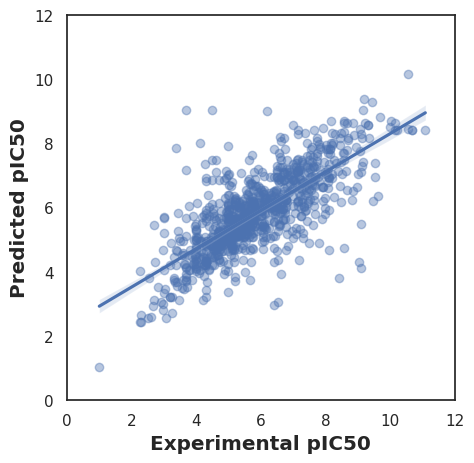

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

**HERE WE HAVE A SCATTER PLOT OF EXPERIMENTAL AND PREDICTED.
[1:10:23]**

# **END OF PART_4**

# ***NEXT: PART_5: MODEL COMPARISON***


**IN THIS CHAPTER WILL GONNA SHOW HOW TO COMPARE SEVERAL MACHINE LEARNING ALGORITHMS FOR BUILDING REGRESSION MODELS FOR ACETYLCHOLINESTERASE INHIBITORS AND TODAY, WE'RE GOING TO BE USING A LAZY (RÁPIDA/SIMPLES/EFICAZ) AND EFFICIENT WAY OF BUILDING SEVERAL MACHINE LEARNING ALGORITHMS AND THIS WAS SHOWN IN A RECENT VIDEO USING THE LAZY PREDICT PYTHON LIBRARY AND SO WE'RE GOING TO BE USING THAT FOR TODAY'S TUTORIAL AND BEFORE PROCEEDING MFURTHER   LET'S DO A QUICK RECAP:

_SO IN **PART_1** WE'VE SHOWN HOW WE CAN COLLECT ORIGINAL DATA SET IN BIOLOGY THAT WE COULD USE IN OUR OWN DATA SCIENCE PROJECT PARTICULALRLY WE HAVE DEMONSTRATED TO HOW WE COULD DOWNLOAD AND PRE-PROCESS THE BIOLOGICAL ACTIVITY DATA FROM THE CHEMBL DATABASE AND THE DATA SET IS COMPRISED OF [1:11:47] OF COMPOUNDS AND MOLECULES THAT HAVE BEEN BIOLOGICALLY TESTED FOR THEIR ACTIVITY TOWARD THE TARGET ORGANISM OR PROTEIN OF INTEREST.
_THEN IN **PART_2** WE HAVE SHOWN HOW WE COULD CALCULATE THE LIPINSKI DESCRIPTORS, WHICH ARE DESCRIPTORS USED FOR EVALUATING THE LIKELIHOOD  OF BEING A DRUG-LIKE MOLECULE AND THEN WE'VE SHOWN HOW WE COULD PERFORM SIME BASIC EXPLORATORY DATA ANALYSIS ON "THESE(SEE IN PART_2)" LIPINSKI DESCRIPTORS PARTICULARLY THE EDA ARE BASED ON MAKING SIMPLE BOX PLOT AND SCATTER PLOT IN ORDER TO VISUALIZE THE DIFFERENCES OF THE ACTIVE AND INACTIVE SUBSET OF THE COMPOUND.
_IN **PART_3** WE HAVE MADE SOME CHANGES TO TARGET PROTEIN AND THEN WE'RE USING THE ACETYLCHOLINESTERASE AS IT PROVIDES A LARGER SET TO WORK WITH. AND SO IN THIS PART_3 WE HAVE ALREADY COMPUTED THE MOLECULAR DESCRIPTORS USING THE "PADEL" DESCRIPTOR SOFTWARE AND THEN WE PREPARED THE DATA SET COMPRISING OFTHE "X" AND "Y" DATA FRAMES AND THEN WE USED THAT TO BUILD A PREDICTION MODEL IN THE SUBSEQUENT PARTS WHICH IS PART_4.
_IN **PART_4** WE USED THE DESCRIPTORS GENERATED FROM PART_3 IN ORDER TO BUILD A REGRESSION MODEL USONG THE RANDOM FOREST ALGORITHM.

_AND NOW TO **PART_5** LET'S GET STARTED:
SO HERE WE'RE GOING TO COMPARE SEVERAL MACHINE LEARNING ALGORITHM USING THE "lazypredict" LIBRARY.
AND SO THE 1ST THING THAT WE NEED TO DO IS (DOWNLOAD THE FILE TO OUR COMPUTER) **